In [2]:
import numpy as np
import os
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def load_images(root_folder):
    images = []
    labels = []

    # Iterate over all subfolders in the root folder
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img = cv2.imread(os.path.join(folder_path, filename))
                # img = cv2.resize(img, (28, 28))  # You can resize images if needed
                if img is not None:
                    images.append(img)
                    labels.append(folder_name)  # Use folder name as the label

    return np.array(images), np.array(labels)

In [ ]:
X_test,y_test= load_images("Tamil/test")
X_train,y_train= load_images("Tamil/train")

In [ ]:
X_test=X_test[:,:,:,0]
X_train=X_train[:,:,:,0]

In [ ]:
X_test=np.expand_dims(X_test, axis=-1)
X_train=np.expand_dims(X_train, axis=-1)

In [ ]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [ ]:
type(y_test[0])

numpy.int64

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(156, activation='softmax'))  

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping and Adam optimizer
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/50
1572/1572 [==============================] - 54s 34ms/step - loss: 5.0507 - accuracy: 0.0083 - val_loss: 5.0495 - val_accuracy: 0.0090
Epoch 2/50
1572/1572 [==============================] - 58s 37ms/step - loss: 5.0504 - accuracy: 0.0090 - val_loss: 5.0494 - val_accuracy: 0.0090
Epoch 3/50
1572/1572 [==============================] - 61s 39ms/step - loss: 5.0504 - accuracy: 0.0090 - val_loss: 5.0494 - val_accuracy: 0.0090
Epoch 4/50
1572/1572 [==============================] - 104s 66ms/step - loss: 5.0504 - accuracy: 0.0090 - val_loss: 5.0494 - val_accuracy: 0.0090
Epoch 5/50
1572/1572 [==============================] - 79s 50ms/step - loss: 5.0504 - accuracy: 0.0090 - val_loss: 5.0494 - val_accuracy: 0.0090
Epoch 6/50
 131/1572 [=>............................] - ETA: 1:04 - loss: 5.0495 - accuracy: 0.0093

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
test_acc+= 0.955


393/393 - 4s - loss: 5.0495 - accuracy: 0.0090 - 4s/epoch - 10ms/step


In [ ]:
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.9639867981150746


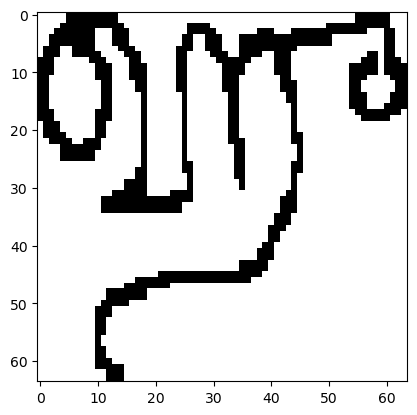

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0,:,:,1],cmap='gray')

In [ ]:
X_test.shape

(12574, 64, 64, 1)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Example NumPy array
data = X_test[:10]

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    # rotation_range = 3,
    width_shift_range=0.5,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.5,  # Shift images vertically by up to 20% of the height
)

# Create output directory if it doesn't exist
output_dir = 'augmented_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each image in the NumPy array
for i, image in enumerate(data):
    # Expand dimensions to (1, 64, 64, 1) to match ImageDataGenerator input shape
    expanded_image = np.expand_dims(image, axis=0)

    # Generate augmented images
    augmented_images = datagen.flow(expanded_image, batch_size=1, save_to_dir=output_dir, save_prefix=f'image_{i}', save_format='jpg')

    # Generate and save images
    for j in range(1):  # Save 5 augmented images per original image
        augmented_image = augmented_images.next()[0].astype('uint8')
        img = Image.fromarray(np.squeeze(augmented_image), 'L')  # Convert back to 2D and to PIL Image
        img.save(os.path.join(output_dir, f'image_{i}_augmented_{j}.jpg'))
